## Data Preproccessing

In [1]:
# !pip install -r requirements.txt
!pip install nltk 
!python -m nltk.downloader stopwords
!pip3 install imblearn

C:\Users\cpere\anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cpere\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from imblearn.over_sampling import SMOTE

In [3]:
def get_cleaned_data():
  df = pd.read_csv('spam.csv', delimiter=',')

  df.drop(df.columns.difference(['v1','v2']), 1, inplace=True)

  nRow, nCol = df.shape
  print(f'There are {nRow} rows and {nCol} columns')

  df = df.rename({
      "v1":"Category",
      "v2":"Message"
  }, axis=1)

  df["Label"] = df["Category"].map({
      "ham": 0,
      "spam": 1,
  })

  print(df.head(10))
  # check for null values 
  print(df.isnull().sum())

  # delete them
  df = df.dropna()
  print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

  # print value count
  print(df["Category"].value_counts())

  #plot data points, we can see its very imbalanced
  sns.countplot(data=df, x="Category")
  plt.title("ham vs spam")
  plt.show()

  # preproccessing
  ps = PorterStemmer()

  def clean_data():

      corpus=[]

      for msg in df["Message"]:
      
          #replace everything thats not a letter with white space
          msg = re.sub("[^a-zA-Z]"," ", msg)

          # replace new line with whitespace
          msg = msg.replace('\n','')
          
          #convert to lowercase
          msg = msg.lower()
          
          #split the word into individual word list
          msg = msg.split()

          #perform stemming using PorterStemmer for all non-english-stopwords
          msg = [ps.stem(words)
                  for words in msg
                  if words not in set(stopwords.words("english"))
                  ]
          #join the word lists with the whitespace
          msg = " ".join(msg)

          corpus.append(msg)
      return corpus 


  data = {'Message': clean_data(), 'Label': df.Label}
  df_new = pd.DataFrame(data=data)


  # new df head
  print(df_new.head()) 

  # split our data from training & testing
  X_train, X_test, y_train, y_test = train_test_split(df_new.Message, df_new.Label, test_size=0.2, random_state=0)

#   sm = SMOTE()
#   X_train, y_train = sm.fit_resample(X_train.values.ravel(), y_train)
#   # print value count
#   print(df[X_train].value_counts())

  # tokenize our data
  vocab_size = 10000 # only consider this many words

  tokenizer = Tokenizer(num_words= vocab_size)
  tokenizer.fit_on_texts(X_train)
  X_train = np.array(tokenizer.texts_to_sequences(X_train))
  X_test = np.array(tokenizer.texts_to_sequences(X_test))


  # add padding to make tokens equal size
  sentence_len=200

  X_train = pad_sequences(X_train,maxlen=sentence_len)
  X_test = pad_sequences(X_test,maxlen=sentence_len)


  return X_train, X_test, y_train, y_test, vocab_size, sentence_len
    

There are 5572 rows and 2 columns
  Category                                            Message  Label
0      ham  Go until jurong point, crazy.. Available only ...      0
1      ham                      Ok lar... Joking wif u oni...      0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3      ham  U dun say so early hor... U c already then say...      0
4      ham  Nah I don't think he goes to usf, he lives aro...      0
5     spam  FreeMsg Hey there darling it's been 3 week's n...      1
6      ham  Even my brother is not like to speak with me. ...      0
7      ham  As per your request 'Melle Melle (Oru Minnamin...      0
8     spam  WINNER!! As a valued network customer you have...      1
9     spam  Had your mobile 11 months or more? U R entitle...      1
Category    0
Message     1
Label       0
dtype: int64
There are 5571 rows and 3 columns
ham     4824
spam     747
Name: Category, dtype: int64


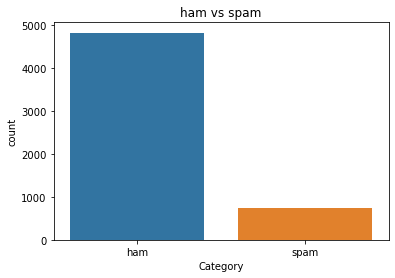

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
2  free entri wkli comp win fa cup final tkt st m...      1
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0


<ipython-input-3-b3c7715397b5>:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(tokenizer.texts_to_sequences(X_train))
<ipython-input-3-b3c7715397b5>:89: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(tokenizer.texts_to_sequences(X_test))


In [4]:
# X_train, X_test, y_train, y_test, vocab_size, sentence_len = get_cleaned_data()